In [ ]:
# EMPLOYEE ATTRITION PREDICTION
#Employee Attrition is the gradual reduction in staff numbers that occurs as employees retire or resign and are not replaced. Employee attrition can be costly for businesses. The company loses employee productivity, and employee knowledge.
#Most businesses main objectives to employee churn is to try to answer the following questions:
#How to reduce employee churn ?
#Why are good employees leaving the company ?
#Can we predict the employees most likely to leave ?
#This is to show how valuable an employee is regardless if that employees position will be filled or not. 

#This EDA will be of great benefit to the besiness because it will enable them to identify aree of focuss 
#during hiring of personnel, identify reasons while staff menbers leave the organization
#and also make recomendations to reduce the attrition rate discovered. 

#The below EDA shows how Machine Learning model predicts if an employee is likely to leave a company.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [2]:
data = pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2013,Lagos_MainLand,1,28,Female,No,3,YES
1,Masters,2016,Lagos_Island,3,27,Male,No,5,YES
2,Masters,2017,Lagos_MainLand,3,24,Male,Yes,2,YES
3,Bachelors,2016,Lagos_Island,3,34,Female,No,2,YES
4,Masters,2012,Lagos_Island,3,27,Male,No,5,YES


In [169]:
#Get the number of rows and number of columns in the data
data.shape

(4653, 9)

In [135]:
#Get the column data types
data.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [3]:
#Count the empty (NaN, NAN, na) values in each column
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [138]:
#Check for any missing or null value

data.isnull().values.any()

False

In [139]:
#View some basic statistical details like percentile, mean, standard deviation etc.
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [140]:
#check the list ofcolumns
data.columns. unique()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [4]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)

data['LeaveOrNot'].value_counts()

NO     3053
YES    1600
Name: LeaveOrNot, dtype: int64

C:\Users\patane\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

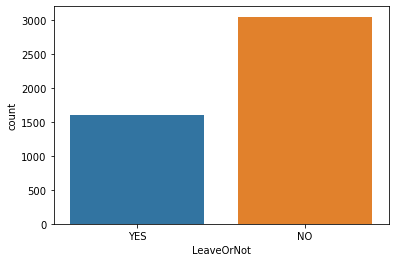

In [176]:
#Showing the number of employees that left and stayed at the company.
sns.countplot(data['LeaveOrNot'])

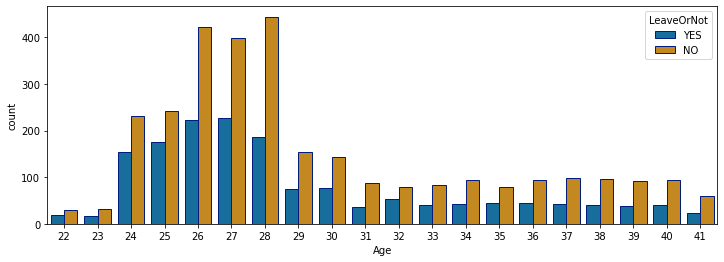

In [174]:
#Show the number of employees that left and stayed at the company by age

import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='LeaveOrNot', data = data, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [175]:
#Print all of the object data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Education : ['Bachelors' 'Masters' 'PHD']
Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64
_________________________________________________________________
City : ['Lagos_MainLand' 'Lagos_Island']
Lagos_MainLand    2425
Lagos_Island      2228
Name: City, dtype: int64
_________________________________________________________________
Gender : ['Female' 'Male']
Male      2778
Female    1875
Name: Gender, dtype: int64
_________________________________________________________________
EverBenched : ['No' 'Yes']
No     4175
Yes     478
Name: EverBenched, dtype: int64
_________________________________________________________________
LeaveOrNot : ['YES' 'NO']
NO     3053
YES    1600
Name: LeaveOrNot, dtype: int64
_________________________________________________________________


<AxesSubplot:>

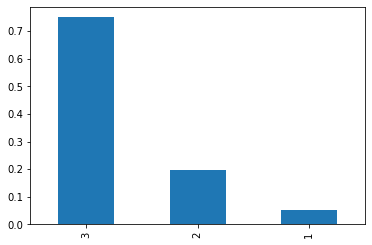

In [5]:
#Get all the number of tier for salary group i.e tier 1,2 and 3
data.PaymentTier.value_counts(normalize=True).plot.bar()

In [150]:
#Get the correlation of the columns
data.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


<AxesSubplot:>

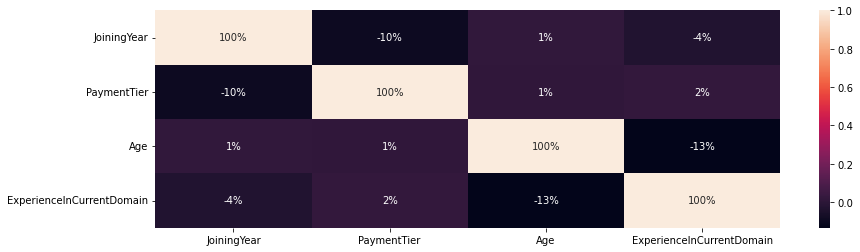

In [173]:
#Visualize the correlation
plt.figure(figsize=(14,4))  #14in by 14in
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [59]:
data.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Lagos_Island,3,34,Male,No,0,0
1,Bachelors,2013,Lagos_MainLand,1,28,Female,No,3,1


In [61]:
data.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Lagos_Island,3,34,Male,No,0,0
1,Bachelors,2013,Lagos_MainLand,1,28,Female,No,3,1


<AxesSubplot:xlabel='ExperienceInCurrentDomain'>

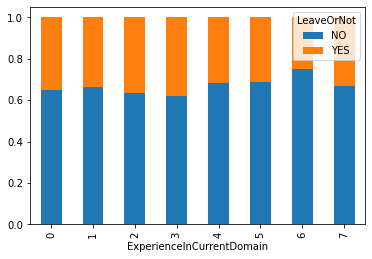

In [171]:
(pd.crosstab(data['ExperienceInCurrentDomain'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True))

<AxesSubplot:xlabel='EverBenched'>

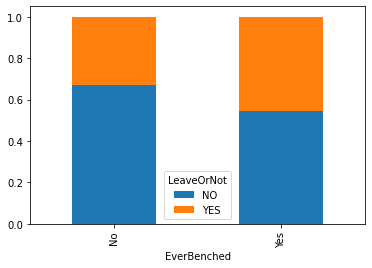

In [170]:
(pd.crosstab(data['EverBenched'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True)
)

<AxesSubplot:xlabel='Gender'>

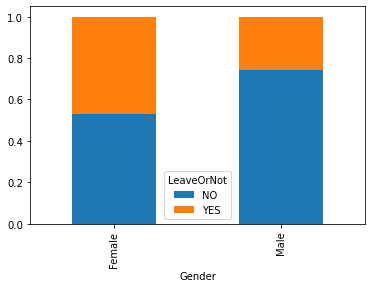

In [6]:
(pd.crosstab(data['Gender'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True)
)


<AxesSubplot:xlabel='PaymentTier'>

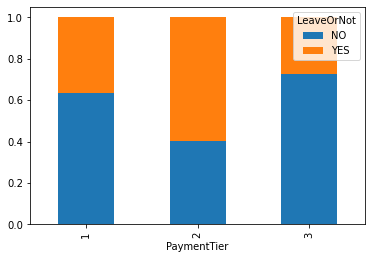

In [7]:
(pd.crosstab(data['PaymentTier'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True)
)

In [ ]:
#From the above, Male workers are likely to leave their jobs.

<AxesSubplot:xlabel='Education'>

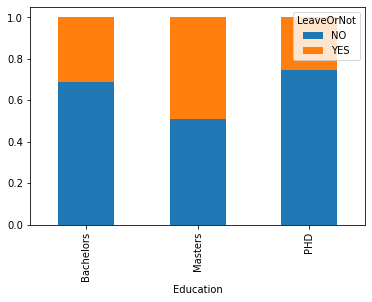

In [8]:
(pd.crosstab(data['Education'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True)
)

In [ ]:
from the above, individuals with Masters degree have higheest numbers of staff that left the organizationfollowed by those individuals with bachelor degree

<AxesSubplot:xlabel='City'>

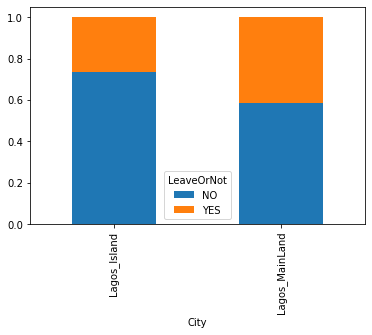

In [9]:
(pd.crosstab(data['City'],data['LeaveOrNot'], 
             normalize='index')
   .plot.bar(stacked=True)
)

In [ ]:
#from the above, individuals leaving in the mainland have higher number of staff that have left the organization

In [41]:
data.head(3)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0


In [42]:
data.LeaveOrNot.unique

<bound method Series.unique of 0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   object
dtypes: int64(4), object(5)
memory usage: 327.3+ KB


In [11]:
data.shape

(4653, 9)

In [12]:
data.City.unique()

array(['Lagos_MainLand', 'Lagos_Island'], dtype=object)

In [13]:
categorical = ['Education', 'City', 'Gender', 'EverBenched' ]
categories = pd.get_dummies(data[categorical])
categories.head()

,Education_Bachelors,Education_Masters,Education_PHD,City_Lagos_Island,City_Lagos_MainLand,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,1,0,0,0,1,1,0,1,0
1,0,1,0,1,0,0,1,1,0
2,0,1,0,0,1,0,1,0,1
3,1,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,1,0


In [14]:
categories.shape

(4653, 9)

In [15]:
data = pd.concat([data,categories], axis=1)

In [16]:
data = data.drop(categorical,axis=1)

In [18]:
data.shape

(4653, 14)

In [191]:
data.head().dtypes

JoiningYear                   int64
PaymentTier                   int64
Age                           int64
ExperienceInCurrentDomain     int64
LeaveOrNot                   object
Education_Bachelors           uint8
Education_Masters             uint8
Education_PHD                 uint8
City_Lagos_Island             uint8
City_Lagos_MainLand           uint8
Gender_Female                 uint8
Gender_Male                   uint8
EverBenched_No                uint8
EverBenched_Yes               uint8
dtype: object

In [19]:
y = data['LeaveOrNot']
X = data.drop(columns =['LeaveOrNot'])

X.head(2)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Lagos_Island,City_Lagos_MainLand,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2013,1,28,3,1,0,0,0,1,1,0,1,0
1,2016,3,27,5,0,1,0,1,0,0,1,1,0


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [23]:
#Decision Tree Classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
D_C = DecisionTreeClassifier()

In [25]:
D_C.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
pred = D_C.predict(X_test)
print(pred, y_test.head(5).tolist())

['YES' 'YES' 'YES' ... 'NO' 'NO' 'NO'] ['NO', 'NO', 'YES', 'YES', 'YES']


In [27]:
#Calculating the accuracy score
print(accuracy_score(pred, y_test))

0.7865329512893983


In [28]:
K_N = KNeighborsClassifier()
K_N.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
pred3 = K_N.predict(X_test)
print(y_test.head(5).tolist(), pred3)

['NO', 'NO', 'YES', 'YES', 'YES'] ['NO' 'NO' 'YES' ... 'NO' 'NO' 'NO']


In [30]:
print(accuracy_score(pred3, y_test))

0.7671919770773639


In [31]:
R_N = RandomForestClassifier()
R_N.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
pred4 = R_N.predict(X_test)

In [33]:
print(y_test.head(5).tolist(), pred4)

['NO', 'NO', 'YES', 'YES', 'YES'] ['YES' 'NO' 'YES' ... 'NO' 'NO' 'NO']


In [34]:
print(accuracy_score(pred4, y_test))

0.7915472779369628


In [38]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, R_N.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[807 122]
 [169 298]]
Model Testing Accuracy = "0.7915472779369628!"



In [40]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':data.iloc[:, 1:data.shape[1]].columns,'importance':np.round(R_N.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
PaymentTier,0.345
ExperienceInCurrentDomain,0.205
Age,0.120
LeaveOrNot,0.097
Education_Masters,0.046
Gender_Female,0.043
Education_Bachelors,0.042
Gender_Male,0.031
City_Lagos_Island,0.021


<AxesSubplot:xlabel='feature'>

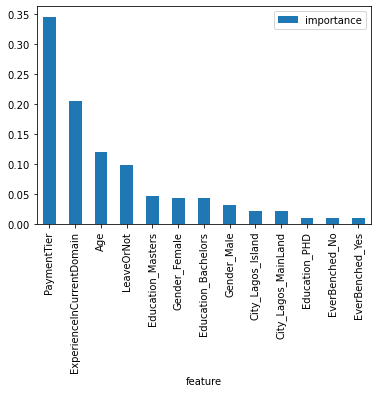

In [41]:
#Visualize the importance
importances.plot.bar()

In [ ]:
# From the above, Payment tier appears to be the most important feature followed by Experience in current 
#domain, age, Education and Gender

#From the above, the business is advised to focuss on staff wellfare by ensuring the following:

#1. The staffs are well enumerated compared with their colleagues from other organisation
#2. Proper training for staff to ensure they are well knowledgable about their job function
#3. Focussing on Hiring of persons above the ages 24yrs -28yrs as they have a higher tendency of leaving the organisation  

#Sugestion: Maybe with some more analysis on the data and tweaking of the program,
#there can be improve models performance and accuracy score.

In [ ]:
#From the model developed above, the RandomForestClassifier model is recomended as it give a higher accuaracy score. ie 79% accuracy score.